In [1]:
# importación de las librerias y bibliotecas que serán utilizadas para el análisis y preparación de los datos
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import RobustScaler
from sklearn.pipeline import Pipeline

In [2]:
#Lectura del dataset 
df = pd.read_csv('star_classification.csv')

In [3]:
#Visualización inicial del conjunto de datos
df

,obj_ID,alpha,delta,u,g,r,i,z,run_ID,rerun_ID,cam_col,field_ID,spec_obj_ID,class,redshift,plate,MJD,fiber_ID
0,1.237661e+18,135.689107,32.494632,23.87882,22.27530,20.39501,19.16573,18.79371,3606,301,2,79,6.543777e+18,GALAXY,0.634794,5812,56354,171
1,1.237665e+18,144.826101,31.274185,24.77759,22.83188,22.58444,21.16812,21.61427,4518,301,5,119,1.176014e+19,GALAXY,0.779136,10445,58158,427
2,1.237661e+18,142.188790,35.582444,25.26307,22.66389,20.60976,19.34857,18.94827,3606,301,2,120,5.152200e+18,GALAXY,0.644195,4576,55592,299
3,1.237663e+18,338.741038,-0.402828,22.13682,23.77656,21.61162,20.50454,19.25010,4192,301,3,214,1.030107e+19,GALAXY,0.932346,9149,58039,775
4,1.237680e+18,345.282593,21.183866,19.43718,17.58028,16.49747,15.97711,15.54461,8102,301,3,137,6.891865e+18,GALAXY,0.116123,6121,56187,842
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99995,1.237679e+18,39.620709,-2.594074,22.16759,22.97586,21.90404,21.30548,20.73569,7778,301,2,581,1.055431e+19,GALAXY,0.000000,9374,57749,438
99996,1.237679e+18,29.493819,19.798874,22.69118,22.38628,20.45003,19.75759,19.41526,7917,301,1,289,8.586351e+18,GALAXY,0.404895,7626,56934,866
99997,1.237668e+18,224.587407,15.700707,21.16916,19.26997,18.20428,17.69034,17.35221,5314,301,4,308,3.112008e+18,GALAXY,0.143366,2764,54535,74
99998,1.237661e+18,212.268621,46.660365,25.35039,21.63757,19.91386,19.07254,18.62482,3650,301,4,131,7.601080e+18,GALAXY,0.455040,6751,56368,470


# Evaluación de los datos

In [4]:
#Visualizamos la informacion básica del conjunto de datos
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 18 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   obj_ID       100000 non-null  float64
 1   alpha        100000 non-null  float64
 2   delta        100000 non-null  float64
 3   u            100000 non-null  float64
 4   g            100000 non-null  float64
 5   r            100000 non-null  float64
 6   i            100000 non-null  float64
 7   z            100000 non-null  float64
 8   run_ID       100000 non-null  int64  
 9   rerun_ID     100000 non-null  int64  
 10  cam_col      100000 non-null  int64  
 11  field_ID     100000 non-null  int64  
 12  spec_obj_ID  100000 non-null  float64
 13  class        100000 non-null  object 
 14  redshift     100000 non-null  float64
 15  plate        100000 non-null  int64  
 16  MJD          100000 non-null  int64  
 17  fiber_ID     100000 non-null  int64  
dtypes: float64(10), int64(7),

In [5]:
#Visualización de la información estadística del conjunto de datos
df.describe()

,obj_ID,alpha,delta,u,g,r,i,z,run_ID,rerun_ID,cam_col,field_ID,spec_obj_ID,redshift,plate,MJD,fiber_ID
count,1.000000e+05,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.0,100000.000000,100000.000000,1.000000e+05,100000.000000,100000.000000,100000.000000,100000.000000
mean,1.237665e+18,177.629117,24.135305,21.980468,20.531387,19.645762,19.084854,18.668810,4481.366060,301.0,3.511610,186.130520,5.783882e+18,0.576661,5137.009660,55588.647500,449.312740
std,8.438560e+12,96.502241,19.644665,31.769291,31.750292,1.854760,1.757895,31.728152,1964.764593,0.0,1.586912,149.011073,3.324016e+18,0.730707,2952.303351,1808.484233,272.498404
min,1.237646e+18,0.005528,-18.785328,-9999.000000,-9999.000000,9.822070,9.469903,-9999.000000,109.000000,301.0,1.000000,11.000000,2.995191e+17,-0.009971,266.000000,51608.000000,1.000000
25%,1.237659e+18,127.518222,5.146771,20.352353,18.965230,18.135828,17.732285,17.460677,3187.000000,301.0,2.000000,82.000000,2.844138e+18,0.054517,2526.000000,54234.000000,221.000000
50%,1.237663e+18,180.900700,23.645922,22.179135,21.099835,20.125290,19.405145,19.004595,4188.000000,301.0,4.000000,146.000000,5.614883e+18,0.424173,4987.000000,55868.500000,433.000000
75%,1.237668e+18,233.895005,39.901550,23.687440,22.123767,21.044785,20.396495,19.921120,5326.000000,301.0,5.000000,241.000000,8.332144e+18,0.704154,7400.250000,56777.000000,645.000000
max,1.237681e+18,359.999810,83.000519,32.781390,31.602240,29.571860,32.141470,29.383740,8162.000000,301.0,6.000000,989.000000,1.412694e+19,7.011245,12547.000000,58932.000000,1000.000000


In [6]:
#Validación si hay algún valor nulo en el conjunto de datos.
df.isna().any()

obj_ID         False
alpha          False
delta          False
u              False
g              False
r              False
i              False
z              False
run_ID         False
rerun_ID       False
cam_col        False
field_ID       False
spec_obj_ID    False
class          False
redshift       False
plate          False
MJD            False
fiber_ID       False
dtype: bool

In [7]:
df['class'].value_counts()

GALAXY    59445
STAR      21594
QSO       18961
Name: class, dtype: int64

In [8]:
# Copiamos el conjunto de datos y transformamos la variable de salida a numérica para calcular correlaciones
df_new = df.copy()
df_new['class'] = df_new['class'].factorize()[0]

In [14]:
df_new

,obj_ID,alpha,delta,u,g,r,i,z,run_ID,rerun_ID,cam_col,field_ID,spec_obj_ID,class,redshift,plate,MJD,fiber_ID
0,1.237661e+18,135.689107,32.494632,23.87882,22.27530,20.39501,19.16573,18.79371,3606,301,2,79,6.543777e+18,0,0.634794,5812,56354,171
1,1.237665e+18,144.826101,31.274185,24.77759,22.83188,22.58444,21.16812,21.61427,4518,301,5,119,1.176014e+19,0,0.779136,10445,58158,427
2,1.237661e+18,142.188790,35.582444,25.26307,22.66389,20.60976,19.34857,18.94827,3606,301,2,120,5.152200e+18,0,0.644195,4576,55592,299
3,1.237663e+18,338.741038,-0.402828,22.13682,23.77656,21.61162,20.50454,19.25010,4192,301,3,214,1.030107e+19,0,0.932346,9149,58039,775
4,1.237680e+18,345.282593,21.183866,19.43718,17.58028,16.49747,15.97711,15.54461,8102,301,3,137,6.891865e+18,0,0.116123,6121,56187,842
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99995,1.237679e+18,39.620709,-2.594074,22.16759,22.97586,21.90404,21.30548,20.73569,7778,301,2,581,1.055431e+19,0,0.000000,9374,57749,438
99996,1.237679e+18,29.493819,19.798874,22.69118,22.38628,20.45003,19.75759,19.41526,7917,301,1,289,8.586351e+18,0,0.404895,7626,56934,866
99997,1.237668e+18,224.587407,15.700707,21.16916,19.26997,18.20428,17.69034,17.35221,5314,301,4,308,3.112008e+18,0,0.143366,2764,54535,74
99998,1.237661e+18,212.268621,46.660365,25.35039,21.63757,19.91386,19.07254,18.62482,3650,301,4,131,7.601080e+18,0,0.455040,6751,56368,470


In [10]:
df_new['class'].value_counts()

0    59445
2    21594
1    18961
Name: class, dtype: int64

In [12]:
# Validación de la correlación entre las variables de entrada con relación a la variable de salida.
corr_matrix = df_new.corr()
corr_matrix["class"].sort_values(ascending=False)

class          1.000000
cam_col        0.023138
i              0.015028
delta          0.014452
MJD           -0.000405
z             -0.001614
plate         -0.010060
spec_obj_ID   -0.010060
alpha         -0.011756
g             -0.020066
u             -0.024645
field_ID      -0.034833
obj_ID        -0.036012
run_ID        -0.036014
fiber_ID      -0.041586
redshift      -0.054239
r             -0.076766
rerun_ID            NaN
Name: class, dtype: float64

In [15]:
#Eliminación de datos que son irrelevantes y que podrian afectar el resultado.
df_new2 = df_new.drop(['obj_ID','run_ID','rerun_ID','field_ID','fiber_ID'], axis=1)

In [16]:
#Vizualición de los cambios aplicados
df_new2

,alpha,delta,u,g,r,i,z,cam_col,spec_obj_ID,class,redshift,plate,MJD
0,135.689107,32.494632,23.87882,22.27530,20.39501,19.16573,18.79371,2,6.543777e+18,0,0.634794,5812,56354
1,144.826101,31.274185,24.77759,22.83188,22.58444,21.16812,21.61427,5,1.176014e+19,0,0.779136,10445,58158
2,142.188790,35.582444,25.26307,22.66389,20.60976,19.34857,18.94827,2,5.152200e+18,0,0.644195,4576,55592
3,338.741038,-0.402828,22.13682,23.77656,21.61162,20.50454,19.25010,3,1.030107e+19,0,0.932346,9149,58039
4,345.282593,21.183866,19.43718,17.58028,16.49747,15.97711,15.54461,3,6.891865e+18,0,0.116123,6121,56187
...,...,...,...,...,...,...,...,...,...,...,...,...,...
99995,39.620709,-2.594074,22.16759,22.97586,21.90404,21.30548,20.73569,2,1.055431e+19,0,0.000000,9374,57749
99996,29.493819,19.798874,22.69118,22.38628,20.45003,19.75759,19.41526,1,8.586351e+18,0,0.404895,7626,56934
99997,224.587407,15.700707,21.16916,19.26997,18.20428,17.69034,17.35221,4,3.112008e+18,0,0.143366,2764,54535
99998,212.268621,46.660365,25.35039,21.63757,19.91386,19.07254,18.62482,4,7.601080e+18,0,0.455040,6751,56368


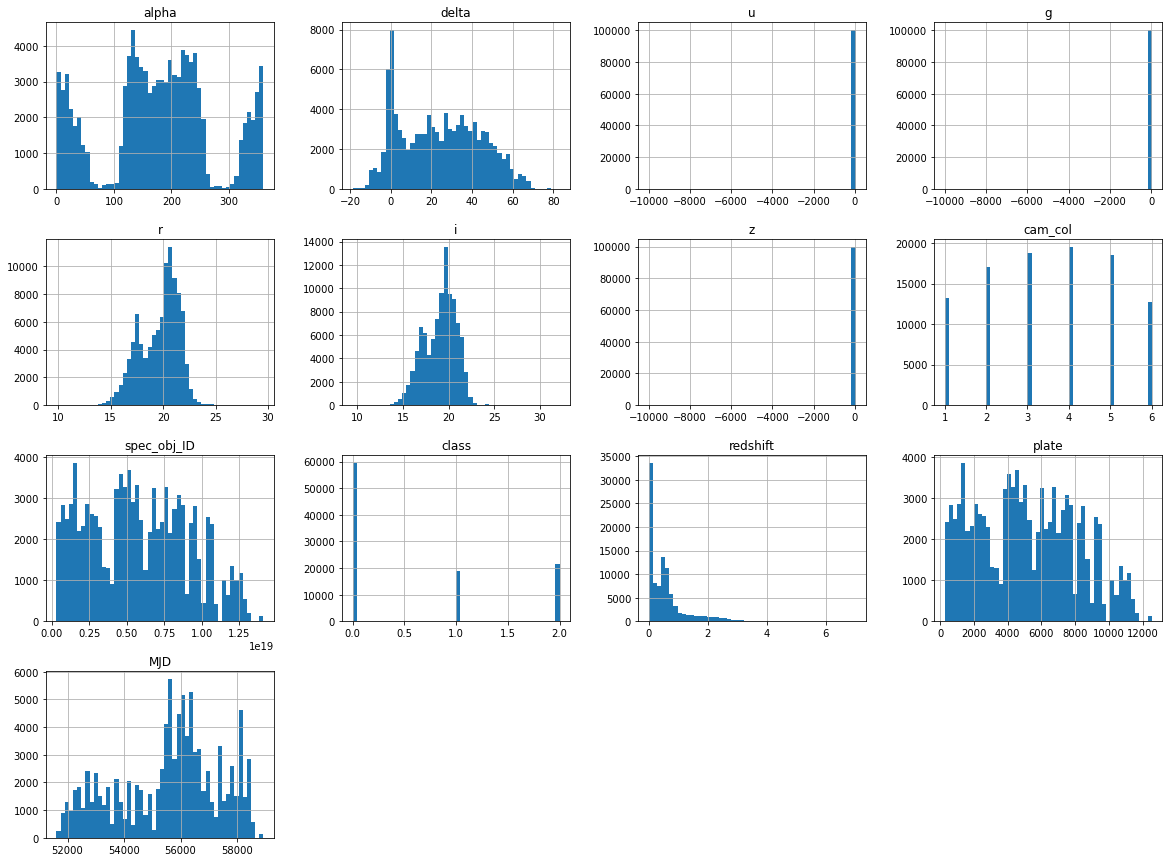

In [18]:
# Representación gráfica de la distribución de los atributos
df_new2.hist(bins=50, figsize=(20,15))
plt.show()

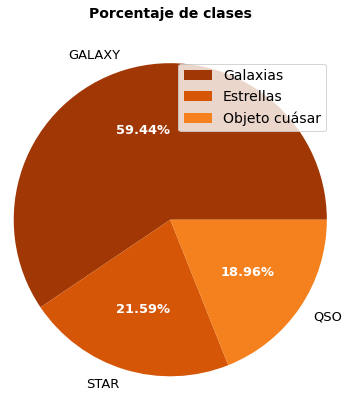

In [48]:
#Creación de una gráfica para representar el porcentaje de las observaciones segun sus 3 clases
Gender = df['class'].value_counts()

fig, ax = plt.subplots(figsize =(8, 6))
_, _, autotexts = ax.pie(x=Gender, labels=Gender.index, autopct="%.2f%%", radius=1.2,
                         colors=sns.color_palette("YlOrBr_r"), explode=None, textprops=dict(fontsize=13))

ax.set_title('Porcentaje de clases', y=1.1,  weight='bold', fontsize=14)
ax.legend(labels=['Galaxias','Estrellas','Objeto cuásar'], fontsize=14)

for autotext in autotexts:
    autotext.set_color('white')
    autotext.set_weight('bold')

## Escalado de los datos

In [50]:
# Conjunto de datos general
X_df = df_new2.drop("class", axis=1)
y_df = df_new2["class"].copy()

In [51]:
#Escalado de los datos
scaler = RobustScaler()
X_scaled = scaler.fit_transform(X_df)

In [52]:
# Transformación a un DataFrame de Pandas
X_scaled = pd.DataFrame(X_scaled, columns=X_df.columns, index=X_df.index)

In [53]:
#Visualización de los cambios
X_scaled

,alpha,delta,u,g,r,i,z,cam_col,spec_obj_ID,redshift,plate,MJD
0,-0.425014,0.254604,0.509637,0.372155,0.092721,-0.089863,-0.085710,-0.666667,0.169259,0.324212,0.169257,0.190916
1,-0.339121,0.219488,0.779126,0.548369,0.845372,0.661725,1.060653,0.333333,1.119762,0.546401,1.119762,0.900315
2,-0.363913,0.343450,0.924694,0.495183,0.166544,-0.021235,-0.022892,-0.666667,-0.084308,0.338683,-0.084321,-0.108730
3,1.483786,-0.691955,-0.012688,0.847457,0.510949,0.412653,0.099781,-0.333333,0.853896,0.782240,0.853875,0.853519
4,1.545280,-0.070841,-0.822154,-1.114299,-1.247120,-1.286698,-1.406245,-0.333333,0.232686,-0.474188,0.232651,0.125246
...,...,...,...,...,...,...,...,...,...,...,...,...
99995,-1.328109,-0.755004,-0.003462,0.593954,0.611473,0.713283,0.703571,-0.666667,0.900040,-0.652938,0.900036,0.739481
99996,-1.423308,-0.110691,0.153533,0.407291,0.111634,0.132289,0.166907,-1.000000,0.541448,-0.029675,0.541417,0.418993
99997,0.410679,-0.228608,-0.302833,-0.579339,-0.660377,-0.643645,-0.671580,0.000000,-0.456063,-0.432253,-0.456070,-0.524381
99998,0.294876,0.662195,0.950876,0.170248,-0.072682,-0.124842,-0.154352,0.000000,0.361916,0.047513,0.361902,0.196422


## Balanceo del dataset

Según el análisis realizado, el conjunto de datos posee un desbalance con 59445 datos de galaxias, 21594 de estrellas y 18961 de objetos cuásar, al entrenar los diferentes algoritmos generaria una matriz de confusión desbalanceda, por lo que se hara uso de la combinación de las técnicas de sobremuestreo y submuestreo para equilibrar la cantidad de datos.

In [59]:
y_df.value_counts()

0    59445
2    21594
1    18961
Name: class, dtype: int64

## Sobremuestreo + Submuestreo

In [54]:
#Importamos los paquetes
from imblearn.combine import SMOTETomek

#Inicialización del método combinado
#SMOTE Tomek
smoteT = SMOTETomek()

In [55]:
#Sobremuestreo con Smote seguido de un submuestreo con Uniones de Tomek
X_smoteT, y_smoteT = smoteT.fit_resample(X_scaled, y_df)
X_smoteT

,alpha,delta,u,g,r,i,z,cam_col,spec_obj_ID,redshift,plate,MJD
0,-0.425014,0.254604,0.509637,0.372155,0.092721,-0.089863,-0.085710,-0.666667,0.169259,0.324212,0.169257,0.190916
1,-0.339121,0.219488,0.779126,0.548369,0.845372,0.661725,1.060653,0.333333,1.119762,0.546401,1.119762,0.900315
2,-0.363913,0.343450,0.924694,0.495183,0.166544,-0.021235,-0.022892,-0.666667,-0.084308,0.338683,-0.084321,-0.108730
3,1.483786,-0.691955,-0.012688,0.847457,0.510949,0.412653,0.099781,-0.333333,0.853896,0.782240,0.853875,0.853519
4,1.545280,-0.070841,-0.822154,-1.114299,-1.247120,-1.286698,-1.406245,-0.333333,0.232686,-0.474188,0.232651,0.125246
...,...,...,...,...,...,...,...,...,...,...,...,...
177768,0.551311,-0.110684,0.492490,0.082783,0.242187,0.452093,0.644489,-0.666667,-0.216654,-0.652458,-0.216667,-0.205773
177769,1.251512,-0.740333,0.662162,-0.055143,-0.203286,-0.249111,-0.302636,-0.666667,-0.752479,-0.652997,-0.752495,-1.019634
177770,-0.580019,-0.672983,-0.769097,-1.185784,-1.290564,-1.297473,-1.346130,0.000000,0.505517,-0.652666,0.505485,0.339524
177771,-1.530870,-0.545467,-0.131160,-0.086822,0.167254,0.558177,0.604410,-0.477423,-0.110572,-0.653358,-0.110584,0.003398


In [57]:
y_smoteT.value_counts()

2    59337
1    59271
0    59165
Name: class, dtype: int64

## Entrenar y evaluar utilizando regresión logística

In [60]:
#División del dataset en conjunto de entramiento y prueba
from sklearn.model_selection import train_test_split
X_train, X_val, y_train, y_val = train_test_split(X_smoteT, y_smoteT, test_size = 0.25, random_state=0)

In [69]:
#Entrenamos un algoritmo basado en regresión logística
from sklearn.linear_model import LogisticRegression

#Creación del modelo
clf = LogisticRegression(max_iter=5000, multi_class='ovr', solver='liblinear').fit(X_train, y_train)

In [70]:
#Prediccion con el conjunto de pruebas
y_pred = clf.predict(X_val)

In [71]:
#Validación del accuracy
from sklearn.metrics import accuracy_score
print('Accuracy: {:.3f}'.format(accuracy_score(y_val, y_pred)))

Accuracy: 0.945


In [72]:
#Validación de la matriz de confusión
from sklearn.metrics import confusion_matrix
confusion_matrix(y_val, y_pred)

array([[13147,  1060,   567],
       [  746, 14116,    13],
       [   64,     0, 14731]], dtype=int64)

C:\Users\eliza\AppData\Roaming\Python\Python38\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


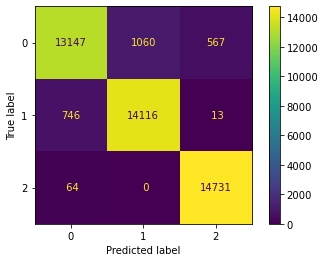

In [73]:
#Representación gráfica de los resultados de la matriz de confusión con el conjunto de pruebas
from sklearn.metrics import plot_confusion_matrix
plot_confusion_matrix(clf, X_val, y_val, values_format='3g')

In [74]:
#Descripción de los resultados de diferentes métricas de medición sobre el modelo entrenado y probado
from sklearn.metrics import confusion_matrix,classification_report,plot_confusion_matrix
print(confusion_matrix(y_val, y_pred))
print(classification_report(y_val, y_pred))

[[13147  1060   567]
 [  746 14116    13]
 [   64     0 14731]]
              precision    recall  f1-score   support

           0       0.94      0.89      0.92     14774
           1       0.93      0.95      0.94     14875
           2       0.96      1.00      0.98     14795

    accuracy                           0.94     44444
   macro avg       0.94      0.94      0.94     44444
weighted avg       0.94      0.94      0.94     44444



## Entrenar y evaluar utilizando bosques aleatorios

In [75]:
#División del dataset en conjunto de entramiento y prueba
from sklearn.model_selection import train_test_split
X_train, X_val, y_train, y_val = train_test_split(X_smoteT, y_smoteT, test_size = 0.25, random_state=0)

In [76]:
# Importación de la librería 
from sklearn.ensemble import RandomForestClassifier

#Creación del modelo
ranforest = RandomForestClassifier()
ranforest.fit(X_train, y_train)

RandomForestClassifier()

In [77]:
#Prediccion con el conjunto de pruebas
y_pred = ranforest.predict(X_val)

In [78]:
#Validación del accuracy
from sklearn.metrics import accuracy_score
print('Accuracy: {:.3f}'.format(accuracy_score(y_val, y_pred)))

Accuracy: 0.984


In [79]:
#Validación de la matriz de confusión
from sklearn.metrics import confusion_matrix
confusion_matrix(y_val, y_pred)

array([[14484,   223,    67],
       [  410, 14465,     0],
       [    0,     0, 14795]], dtype=int64)

C:\Users\eliza\AppData\Roaming\Python\Python38\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


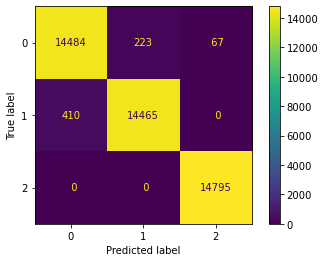

In [80]:
#Representación gráfica de los resultados de la matriz de confusión con el conjunto de pruebas
from sklearn.metrics import plot_confusion_matrix

plot_confusion_matrix(ranforest, X_val, y_val, values_format='3g')

In [81]:
#Descripción de los resultados de diferentes métricas de medición sobre el modelo entrenado y probado
from sklearn.metrics import confusion_matrix,classification_report,plot_confusion_matrix
print(confusion_matrix(y_val, y_pred))
print(classification_report(y_val, y_pred))

[[14484   223    67]
 [  410 14465     0]
 [    0     0 14795]]
              precision    recall  f1-score   support

           0       0.97      0.98      0.98     14774
           1       0.98      0.97      0.98     14875
           2       1.00      1.00      1.00     14795

    accuracy                           0.98     44444
   macro avg       0.98      0.98      0.98     44444
weighted avg       0.98      0.98      0.98     44444



## Entrenar y evaluar utilizando K-Nearest Neighbors

In [82]:
#División del dataset en conjunto de entramiento y prueba
from sklearn.model_selection import train_test_split
X_train, X_val, y_train, y_val = train_test_split(X_smoteT, y_smoteT, test_size = 0.25, random_state=0)

In [83]:
# Ajustar el clasificador en el Conjunto de Entrenamiento
from sklearn.neighbors import KNeighborsClassifier
classifier = KNeighborsClassifier(n_neighbors = 5, metric = "minkowski", p = 2)
classifier.fit(X_train, y_train)

KNeighborsClassifier()

In [84]:
# Predicción de los resultados con el Conjunto de Testing
y_pred  = classifier.predict(X_val)

In [85]:
#Validación del accuracy
from sklearn.metrics import accuracy_score
print('Accuracy: {:.3f}'.format(accuracy_score(y_val, y_pred)))

Accuracy: 0.965


In [86]:
#Validación de la matriz de confusión
from sklearn.metrics import confusion_matrix
confusion_matrix(y_val, y_pred)

array([[13812,   439,   523],
       [  343, 14485,    47],
       [  185,     8, 14602]], dtype=int64)

C:\Users\eliza\AppData\Roaming\Python\Python38\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


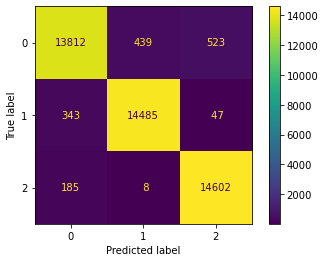

In [87]:
#Representación gráfica de los resultados de la matriz de confusión con el conjunto de pruebas
from sklearn.metrics import plot_confusion_matrix
plot_confusion_matrix(classifier, X_val, y_val, values_format='3g')

In [88]:
#Descripción de los resultados de diferentes métricas de medición sobre el modelo entrenado y probado
from sklearn.metrics import confusion_matrix,classification_report,plot_confusion_matrix
print(confusion_matrix(y_val, y_pred))
print(classification_report(y_val, y_pred))

[[13812   439   523]
 [  343 14485    47]
 [  185     8 14602]]
              precision    recall  f1-score   support

           0       0.96      0.93      0.95     14774
           1       0.97      0.97      0.97     14875
           2       0.96      0.99      0.97     14795

    accuracy                           0.97     44444
   macro avg       0.97      0.97      0.97     44444
weighted avg       0.97      0.97      0.97     44444



## Entrenar y evaluar utilizando Support Vector Machine

In [89]:
#División del dataset en conjunto de entramiento y prueba
from sklearn.model_selection import train_test_split
X_train, X_val, y_train, y_val = train_test_split(X_smoteT, y_smoteT, test_size = 0.25, random_state=0)

In [90]:
# Ajustar el SVM en el Conjunto de Entrenamiento
from sklearn.svm import SVC
classifier = SVC(kernel = "linear", random_state = 0)
classifier.fit(X_train, y_train)

SVC(kernel='linear', random_state=0)

In [91]:
# Predicción de los resultados con el Conjunto de Testing
y_pred  = classifier.predict(X_val)

In [92]:
#Validación del accuracy
from sklearn.metrics import accuracy_score
print('Accuracy: {:.3f}'.format(accuracy_score(y_val, y_pred)))

Accuracy: 0.962


In [93]:
#Validación de la matriz de confusión
from sklearn.metrics import confusion_matrix
confusion_matrix(y_val, y_pred)

array([[14147,   437,   190],
       [ 1076, 13796,     3],
       [    0,     0, 14795]], dtype=int64)

C:\Users\eliza\AppData\Roaming\Python\Python38\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


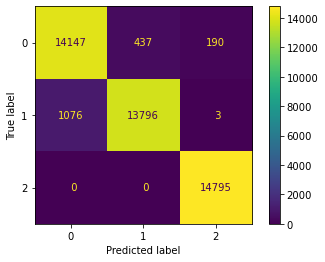

In [94]:
#Representación gráfica de los resultados de la matriz de confusión con el conjunto de pruebas
from sklearn.metrics import plot_confusion_matrix
plot_confusion_matrix(classifier, X_val, y_val, values_format='3g')

In [95]:
#Descripción de los resultados de diferentes métricas de medición sobre el modelo entrenado y probado
from sklearn.metrics import confusion_matrix,classification_report,plot_confusion_matrix
print(confusion_matrix(y_val, y_pred))
print(classification_report(y_val, y_pred))

[[14147   437   190]
 [ 1076 13796     3]
 [    0     0 14795]]
              precision    recall  f1-score   support

           0       0.93      0.96      0.94     14774
           1       0.97      0.93      0.95     14875
           2       0.99      1.00      0.99     14795

    accuracy                           0.96     44444
   macro avg       0.96      0.96      0.96     44444
weighted avg       0.96      0.96      0.96     44444



## Entrenar y evaluar utilizando árboles de decisión

In [106]:
#División del dataset en conjunto de entramiento y prueba
from sklearn.model_selection import train_test_split
X_train, X_val, y_train, y_val = train_test_split(X_smoteT, y_smoteT, test_size = 0.25, random_state=0)

In [107]:
# Ajustar el clasificador de Árbol de Decisión en el Conjunto de Entrenamiento
from sklearn.tree import DecisionTreeClassifier
classifier = DecisionTreeClassifier(criterion = "entropy", random_state = 0)
classifier.fit(X_train, y_train)

DecisionTreeClassifier(criterion='entropy', random_state=0)

In [108]:
# Predicción de los resultados con el Conjunto de Testing
y_pred  = classifier.predict(X_val)

In [109]:
#Validación del accuracy
from sklearn.metrics import accuracy_score
print('Accuracy: {:.3f}'.format(accuracy_score(y_val, y_pred)))

Accuracy: 0.976


In [110]:
#Validación de la matriz de confusión
from sklearn.metrics import confusion_matrix
confusion_matrix(y_val, y_pred)

array([[14194,   556,    24],
       [  474, 14401,     0],
       [   33,     1, 14761]], dtype=int64)

C:\Users\eliza\AppData\Roaming\Python\Python38\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


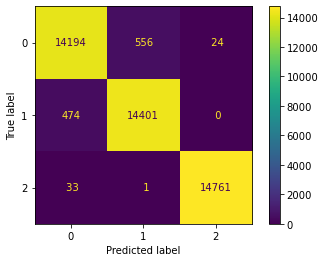

In [111]:
#Representación gráfica de los resultados de la matriz de confusión con el conjunto de pruebas
from sklearn.metrics import plot_confusion_matrix
plot_confusion_matrix(classifier, X_val, y_val, values_format='3g')

In [112]:
#Descripción de los resultados de diferentes métricas de medición sobre el modelo entrenado y probado
from sklearn.metrics import confusion_matrix,classification_report,plot_confusion_matrix
print(confusion_matrix(y_val, y_pred))
print(classification_report(y_val, y_pred))

[[14194   556    24]
 [  474 14401     0]
 [   33     1 14761]]
              precision    recall  f1-score   support

           0       0.97      0.96      0.96     14774
           1       0.96      0.97      0.97     14875
           2       1.00      1.00      1.00     14795

    accuracy                           0.98     44444
   macro avg       0.98      0.98      0.98     44444
weighted avg       0.98      0.98      0.98     44444

